## Summary:
* Used pretrained MPNVAE-h450-L56-d3-beta0.005/model.iter-4 which is available in JT github
* Generated 10 molecules
* Plotted them using Draw package (display(mol) doensn't work for Python2 for some reason)
* Intersting that within the 10 molecules there are molecules with $NH_2^{+}$ cation, fluorine and bromine atoms. It shows the diversity of the generated latent space. None of them can be found in PubChem, so all of them are really new. 
* I'm not sure that charged molecules are actively used as drugs, so maybe it's one of the ways to improve the space.

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt

In [2]:
import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

In [3]:
from molvae.sample import sample

In [4]:
sampled_molecules = sample(
    hidden_size=450,
    latent_size=56,
    depth=3,
    nsample=10,
    stereo=True,
    vocab_path='../data/zinc/vocab.txt',
    model_path='../molvae/MPNVAE-h450-L56-d3-beta0.005/model.iter-4'
)

/home/lizzka239/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/lizzka239/Documents/mol_generation/jtnn/jtnn_dec.py:232: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_score = nn.Softmax()(self.W_o(pred_hidden) * 20)


COc1ncc(C(=O)NCc2cccc(Br)c2)c(C)n1
Cc1noc(CC(=O)N2CCOCC[C@@H]2C(C)C)n1
CC(=O)N1C=C(CC(=O)N[C@@H]2CCc3ccccc3C2)CC1
CNC(=O)C1=CN(Cc2ccoc2C)c2ccccc2S1
Cc1[nH]ncc1NC(=O)c1cccc(OCC(N)=O)c1
C[C@H]1C[C@H](NC(=O)Cc2ccc(N)nc2)CC[NH2+]1
CCCN(C)[C@@H](C=O)CNc1ccc(C#N)c2c1NCCO2
CCNS(=O)(=O)c1ccccc1C(=O)N1CCO[C@@H](C)C1
COc1ccc(C(=O)NCc2cccc3c2OCO3)nc1
CC(=O)N1C=C[C@@H](C(=O)Oc2cccc(C(F)F)c2)C1


In [5]:
mols = [Chem.MolFromSmiles(smiles) for smiles in sampled_molecules]

In [8]:
img=Draw.MolsToGridImage(mols,molsPerRow=3,subImgSize=(350,350),legends=sampled_molecules)    

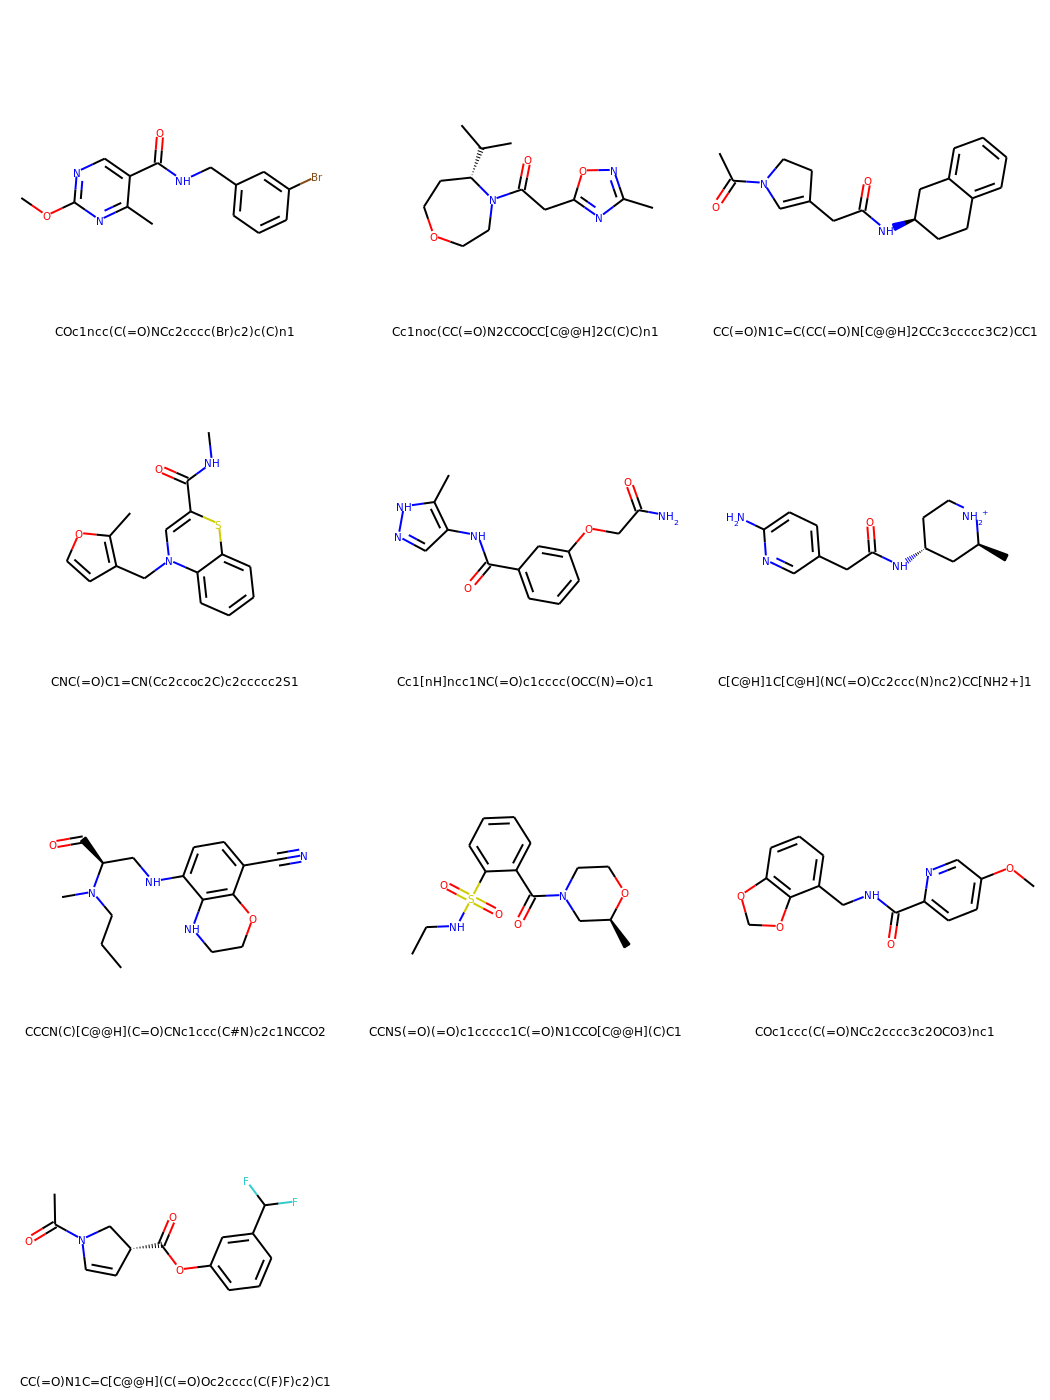

In [9]:
display(img)